# Detrending

`import numpy as np
import statsmodels.api as sm`

**...**


` hpcycle, hyptrend = sm.ts.filters.hpfilter(data['Y']) 
`

`dtsmall = data[['Y','C','I','G','NX']]
bkcycle = sm.tsa.filters.bkfilter(data['Y'])
bktrend = dtsmall[Y'] - bkcycle`

# Pandas cont.

In [7]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt

# Merging data sets

In [9]:
EUurl = "http://research.stlouisfed.org/fred2/series/CPMNACSCAB1GQEU272020/downloaddata/CPMNACSCAB1GQEU272020.csv"
USurl = "http://research.stlouisfed.org/fred2/series/GDPC1/downloaddata/GDPC1.csv"

In [23]:
EU = pd.read_csv(EUurl, parse_dates=['DATE'], index_col=0) #parse_dates=True
US = pd.read_csv(USurl, parse_dates=['DATE'], index_col=0)

In [24]:
EU.head()

,VALUE
DATE,
1995-01-01,1552356.9
1995-04-01,1570790.8
1995-07-01,1598186.5
1995-10-01,1617057.9
1996-01-01,1634593.4


In [25]:
US.head()

,VALUE
DATE,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442


<AxesSubplot:xlabel='DATE'>

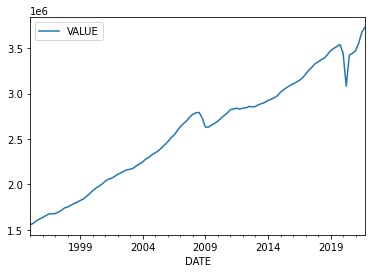

In [26]:
EU.plot()

<AxesSubplot:xlabel='DATE'>

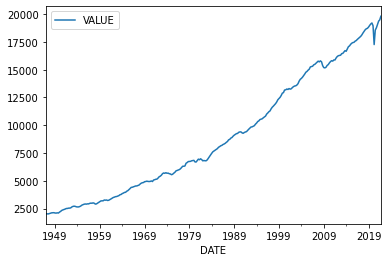

In [22]:
US.plot()

Three ways to merge

1) `pd.concat([dfs...])`

2) `pd.merge(df1,df2)`

3) `df1.join(df2)`

# Concat

In [29]:
pd.concat([US,EU]) #default axis=0, two df's stacked on top of each other

,VALUE
DATE,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442
...,...
2020-10-01,3442595.300
2021-01-01,3472775.400
2021-04-01,3557639.200


In [30]:
# axis=1, df's side by side

pd.concat([US,EU],axis=1)

,VALUE,VALUE
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN
...,...,...
2020-10-01,18767.778,3442595.3
2021-01-01,19055.655,3472775.4
2021-04-01,19368.310,3557639.2


In [31]:
names = {'VALUE':'EU_GDP'}
EU2 = EU.rename(columns=names)

In [34]:
pd.concat([US,EU2])

,VALUE,EU_GDP
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN
...,...,...
2020-10-01,NaN,3442595.3
2021-01-01,NaN,3472775.4
2021-04-01,NaN,3557639.2


In [35]:
pd.concat([US,EU2],axis=1)

,VALUE,EU_GDP
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN
...,...,...
2020-10-01,18767.778,3442595.3
2021-01-01,19055.655,3472775.4
2021-04-01,19368.310,3557639.2


In [37]:
pd.concat([US,EU2],axis=1,join='inner') #default join='outer' (union) - 'inner' := intersect

,VALUE,EU_GDP
DATE,,
1995-01-01,10550.251,1552356.9
1995-04-01,10581.723,1570790.8
1995-07-01,10671.738,1598186.5
1995-10-01,10744.203,1617057.9
1996-01-01,10824.674,1634593.4
...,...,...
2020-10-01,18767.778,3442595.3
2021-01-01,19055.655,3472775.4
2021-04-01,19368.310,3557639.2


# Merge

In [39]:
pd.merge(US,EU) #doesnt work because VALUE is the only common column name, which by default is used to join

,VALUE


In [42]:
#pd.merge(US,EU2) #doesnt work because no common column name

In [43]:
pd.merge(US,EU,on='DATE')

,VALUE_x,VALUE_y
DATE,,
1995-01-01,10550.251,1552356.9
1995-04-01,10581.723,1570790.8
1995-07-01,10671.738,1598186.5
1995-10-01,10744.203,1617057.9
1996-01-01,10824.674,1634593.4
...,...,...
2020-10-01,18767.778,3442595.3
2021-01-01,19055.655,3472775.4
2021-04-01,19368.310,3557639.2


In [45]:
pd.merge(US,EU2,left_index=True,right_index=True)

,VALUE,EU_GDP
DATE,,
1995-01-01,10550.251,1552356.9
1995-04-01,10581.723,1570790.8
1995-07-01,10671.738,1598186.5
1995-10-01,10744.203,1617057.9
1996-01-01,10824.674,1634593.4
...,...,...
2020-10-01,18767.778,3442595.3
2021-01-01,19055.655,3472775.4
2021-04-01,19368.310,3557639.2


In [47]:
pd.merge(US,EU2,left_on='DATE',right_on='DATE')

,VALUE,EU_GDP
DATE,,
1995-01-01,10550.251,1552356.9
1995-04-01,10581.723,1570790.8
1995-07-01,10671.738,1598186.5
1995-10-01,10744.203,1617057.9
1996-01-01,10824.674,1634593.4
...,...,...
2020-10-01,18767.778,3442595.3
2021-01-01,19055.655,3472775.4
2021-04-01,19368.310,3557639.2


In [49]:
US.reset_index()

,DATE,VALUE
0,1947-01-01,2034.450
1,1947-04-01,2029.024
2,1947-07-01,2024.834
3,1947-10-01,2056.508
4,1948-01-01,2087.442
...,...,...
295,2020-10-01,18767.778
296,2021-01-01,19055.655
297,2021-04-01,19368.310
298,2021-07-01,19478.893


In [50]:
EU.reset_index()

,DATE,VALUE
0,1995-01-01,1552356.9
1,1995-04-01,1570790.8
2,1995-07-01,1598186.5
3,1995-10-01,1617057.9
4,1996-01-01,1634593.4
...,...,...
103,2020-10-01,3442595.3
104,2021-01-01,3472775.4
105,2021-04-01,3557639.2
106,2021-07-01,3676729.1


In [48]:
pd.merge(US.reset_index(),EU2.reset_index())

,DATE,VALUE,EU_GDP
0,1995-01-01,10550.251,1552356.9
1,1995-04-01,10581.723,1570790.8
2,1995-07-01,10671.738,1598186.5
3,1995-10-01,10744.203,1617057.9
4,1996-01-01,10824.674,1634593.4
...,...,...,...
103,2020-10-01,18767.778,3442595.3
104,2021-01-01,19055.655,3472775.4
105,2021-04-01,19368.310,3557639.2
106,2021-07-01,19478.893,3676729.1


In [51]:
pd.merge(US.reset_index(),EU2.reset_index(),how='outer')

,DATE,VALUE,EU_GDP
0,1947-01-01,2034.450,NaN
1,1947-04-01,2029.024,NaN
2,1947-07-01,2024.834,NaN
3,1947-10-01,2056.508,NaN
4,1948-01-01,2087.442,NaN
...,...,...,...
295,2020-10-01,18767.778,3442595.3
296,2021-01-01,19055.655,3472775.4
297,2021-04-01,19368.310,3557639.2
298,2021-07-01,19478.893,3676729.1


# Join

In [53]:
US.join(EU,lsuffix='_US',rsuffix='_EU')

,VALUE_US,VALUE_EU
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN
...,...,...
2020-10-01,18767.778,3442595.3
2021-01-01,19055.655,3472775.4
2021-04-01,19368.310,3557639.2


In [ ]:
EU.join(US,lsuffix='_EU',rsuffix='_US')

In [52]:
US.join(EU2)

,VALUE,EU_GDP
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN
...,...,...
2020-10-01,18767.778,3442595.3
2021-01-01,19055.655,3472775.4
2021-04-01,19368.310,3557639.2


# Merge data with multi-index

In [56]:
US['country'] = 'US'

In [57]:
US.head()

,VALUE,country
DATE,,
1947-01-01,2034.450,US
1947-04-01,2029.024,US
1947-07-01,2024.834,US
1947-10-01,2056.508,US
1948-01-01,2087.442,US


In [58]:
EU['country'] = 'EU'

In [59]:
EU.head()

,VALUE,country
DATE,,
1995-01-01,1552356.9,EU
1995-04-01,1570790.8,EU
1995-07-01,1598186.5,EU
1995-10-01,1617057.9,EU
1996-01-01,1634593.4,EU


In [60]:
US.rename(columns={'VALUE':'GDP'},inplace=True)
EU.rename(columns={'VALUE':'GDP'},inplace=True)

In [61]:
US

,GDP,country
DATE,,
1947-01-01,2034.450,US
1947-04-01,2029.024,US
1947-07-01,2024.834,US
1947-10-01,2056.508,US
1948-01-01,2087.442,US
...,...,...
2020-10-01,18767.778,US
2021-01-01,19055.655,US
2021-04-01,19368.310,US


In [62]:
EU

,GDP,country
DATE,,
1995-01-01,1552356.9,EU
1995-04-01,1570790.8,EU
1995-07-01,1598186.5,EU
1995-10-01,1617057.9,EU
1996-01-01,1634593.4,EU
...,...,...
2020-10-01,3442595.3,EU
2021-01-01,3472775.4,EU
2021-04-01,3557639.2,EU


In [63]:
gdpdata = pd.concat([US,EU])

In [65]:
gdpdata

,GDP,country
DATE,,
1947-01-01,2034.450,US
1947-04-01,2029.024,US
1947-07-01,2024.834,US
1947-10-01,2056.508,US
1948-01-01,2087.442,US
...,...,...
2020-10-01,3442595.300,EU
2021-01-01,3472775.400,EU
2021-04-01,3557639.200,EU


In [66]:
gdpdata.reset_index(inplace=True)

In [67]:
gdpdata

,DATE,GDP,country
0,1947-01-01,2034.450,US
1,1947-04-01,2029.024,US
2,1947-07-01,2024.834,US
3,1947-10-01,2056.508,US
4,1948-01-01,2087.442,US
...,...,...,...
403,2020-10-01,3442595.300,EU
404,2021-01-01,3472775.400,EU
405,2021-04-01,3557639.200,EU
406,2021-07-01,3676729.100,EU


In [68]:
gdpdata.set_index(['country','DATE'],inplace=True)

In [69]:
gdpdata

GDP
country DATE                   
US      1947-01-01     2034.450
        1947-04-01     2029.024
        1947-07-01     2024.834
        1947-10-01     2056.508
        1948-01-01     2087.442
...                         ...
EU      2020-10-01  3442595.300
        2021-01-01  3472775.400
        2021-04-01  3557639.200
        2021-07-01  3676729.100
        2021-10-01  3730472.200

[408 rows x 1 columns]

In [70]:
gdpdata.loc[('US','2020')]

/Users/andynguyen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:3761: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  return self[key]


,GDP
DATE,
2020-01-01,18951.992
2020-04-01,17258.205
2020-07-01,18560.774
2020-10-01,18767.778


In [71]:
EUurl2 = 'http://research.stlouisfed.org/fred2/series/LRHUTTTTEUM156S/downloaddata/LRHUTTTTEUM156S.csv'
USurl2 = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'

In [86]:
new_EU = pd.read_csv(EUurl2,index_col=0,parse_dates=True)
new_US = pd.read_csv(USurl2,index_col=0,parse_dates=True)

In [87]:
new_EU

,VALUE
DATE,
2000-01-01,9.2
2000-02-01,9.2
2000-03-01,9.2
2000-04-01,9.1
2000-05-01,9.1
...,...
2019-09-01,6.3
2019-10-01,6.2
2019-11-01,6.2


In [89]:
new_US

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2021-11-01,4.2
2021-12-01,3.9
2022-01-01,4.0


In [83]:
new_EU.resample('Q')

In [91]:
new_EU.join(new_US,lsuffix='_EU',rsuffix='_US')

,VALUE_EU,VALUE_US
DATE,,
2000-01-01,9.2,4.0
2000-02-01,9.2,4.1
2000-03-01,9.2,4.0
2000-04-01,9.1,3.8
2000-05-01,9.1,4.0
...,...,...
2019-09-01,6.3,3.5
2019-10-01,6.2,3.6
2019-11-01,6.2,3.6
